# Tarea Semanal 2: Algoritmo para calcular la DFT


Desarrollar un algoritmo que calcule la transformada discreta de Fourier (DFT).

𝑋[𝑘]=∑ (desde 𝑛=0 hasta n= 𝑁−1) 𝑥[n].𝑒^(-j*2pi*k*n/N)


XX = mi_funcion_DFT( xx )

xx: señal a analizar, una matriz (Nx1) de números reales. 

XX: DFT de xx, una matriz (Nx1) de números complejos.

### Codigo de Python

Text(0, 0.5, '|X[k]|')

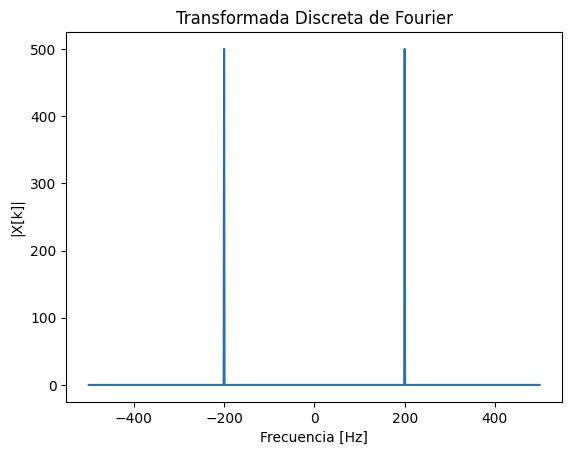

In [4]:
import numpy as np
import matplotlib.pyplot as plt


N= 1000#
fs= 1000 #Hz
fo = 1 #DeltaF

ts = 1/fs #s

def mi_funcion_sen( vmax = 1, dc = 0, ff = 1, ph=0, nn = N, fs = fs):
    tt = np.arange(nn) * (1/fs)   # vector de tiempo    
    xx = vmax * np.sin(tt*2*np.pi*ff + ph) + dc

    return tt, xx
   
def mi_funcion_DFT(xx):
    N=  len(xx)
    xx=np.array(xx).reshape(N, 1) #Vector columna
    n= np.arange(N).reshape(N, 1) #Armo un vector columna
    k= np.arange(N).reshape(1,N) #Armo un vector fila
    
    twiddle= np.exp(-1j*2*np.pi*n*k/N)
    
    #XX= np.dot(xx.reshape(1,N), twiddle)
    XX = np.dot(twiddle.T, xx) #El .T es para hacer la transpuesta
    return XX
    
# ts = 1/fs #s
tt, xx = mi_funcion_sen( vmax = 1, dc = 0, ff = 200, ph=0, nn = N, fs = fs)
XX = mi_funcion_DFT(xx)

f = np.arange(-N/2, N/2) * fs / N  #De esta forma me queda centrado y puedo ver las frecuencias posritivas y las negativa
plt.plot(f, np.abs(np.fft.fftshift(XX)), color="#2271B3") #Con el shifteo  me queda centrado y puedo ver las frecuencias posritivas y las negativa
#plt.plot(f, np.abs(XX), color= "#2271B3") #De esta forma me grafica pero en 200 y 800 Hz pero no es exactamente lo que quiero
plt.title('Transformada Discreta de Fourier')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|X[k]|')

Para realizar esta tarea, en primer lugar se guardó en la variable N la cantidad de muestras con las que se va a trabajar. Luego, se debió armar un vector fila utilizando los valores correspondientes a la funciòn recibida por mi_funcion_DFT, en este caso, una senoidal. A continuación, se armó un vector fila para el tiempo. Una vez realizado ello, se creó una matriz twiddle que será la encargada de hacer 𝑒^(-j*2pi*k*n/N).

Por último, para graficar, se utilizó la funciòn np.arange(-N/2, N/2) * fs / N  para poder graficar las frecuencias positivas y las negativas. Luego, con el comando fft.fftshift(XX) se puede centrar la señal para que quede en 200Hz y -200Hz. En el caso de no usar estas funciones, se podían observar las Deltas de Kronecker resultantes en 200 Hz y 800Hz